<h1> 23AIML010 OM CHOKSI PMRP ASSIGNMENT 2</h1>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Find out the outliers in each numerical column
2. Find out gender distribution in this data.
3. What is average daily usage of data? Explore gender wise and device wise variation in average usage of data.
4. Which device have highest popularity based on Age and Gender?

WE WILL LOAD CSV FILE AND GET BASIC DESCRIPTION OF DATA


In [47]:

data1 =  pd.read_csv("data.csv")
data.head(),data.describe(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


(   Age Sex      BP Cholesterol  Na_to_K   Drug
 0   23   F    HIGH        HIGH   25.355  drugY
 1   47   M     LOW        HIGH   13.093  drugC
 2   47   M     LOW        HIGH   10.114  drugC
 3   28   F  NORMAL        HIGH    7.798  drugX
 4   61   F     LOW        HIGH   18.043  drugY,
               Age     Na_to_K
 count  200.000000  200.000000
 mean    44.315000   16.084485
 std     16.544315    7.223956
 min     15.000000    6.269000
 25%     31.000000   10.445500
 50%     45.000000   13.936500
 75%     58.000000   19.380000
 max     74.000000   38.247000,
 None)

Find out the outliers in each numerical column using pandas

In [48]:
def detect_outliers(data1, column):
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data1[(data1[column] < lower_bound) | (data1[column] > upper_bound)]
    return outliers


numerical_columns = data1.select_dtypes(include=np.number).columns

outliers_dict = {col: detect_outliers(data1, col) for col in numerical_columns}

for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:\n", outliers)

Outliers in User ID:
 Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []
Outliers in App Usage Time (min/day):
 Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []
Outliers in Screen On Time (hours/day):
 Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []
Outliers in Battery Drain (mAh/day):
 Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Num

2. Find out gender distribution in this data.


Gender Distribution:
Gender
Male      365
Female    336
Name: count, dtype: int64


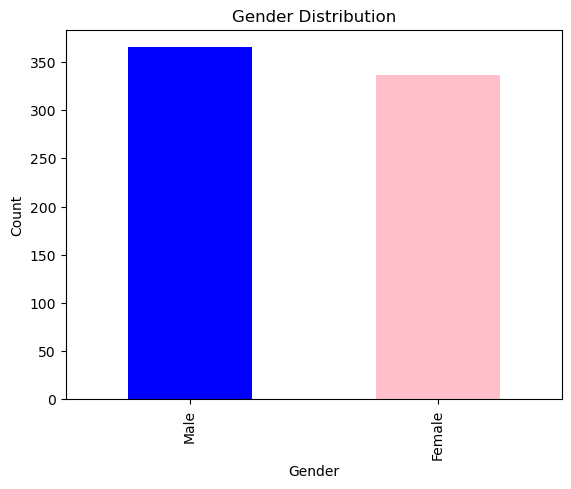

In [49]:

gender_distribution = data1['Gender'].value_counts()
print("Gender Distribution:")
print(gender_distribution)

gender_distribution.plot(kind='bar', color=['blue', 'pink'], title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

3. What is average daily usage of data? Explore gender wise and device wise variation in average usage of data.

Overall Average Daily Usage: 931.3380884450785
Gender-wise Average Daily Usage:
Gender
Female    914.321429
Male      947.002740
Name: Data Usage (MB/day), dtype: float64
Device-wise Average Daily Usage:
Device Model
Google Pixel 5         897.704225
IQOO NEO 7            2048.000000
OnePlus 9              911.120301
Samsung Galaxy S21     931.872180
Xiaomi Mi 11           940.164384
iPhone 12              965.506849
Name: Data Usage (MB/day), dtype: float64


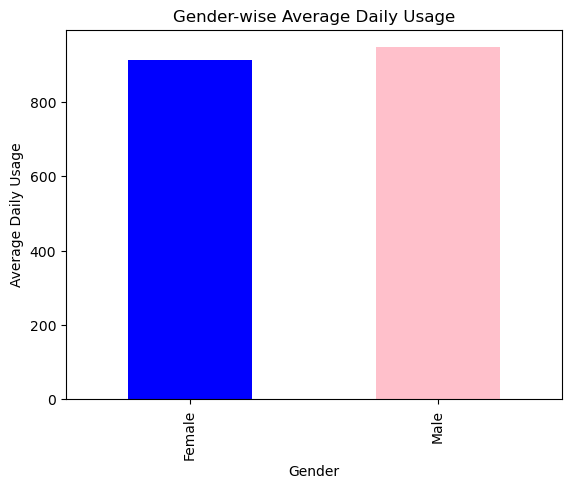

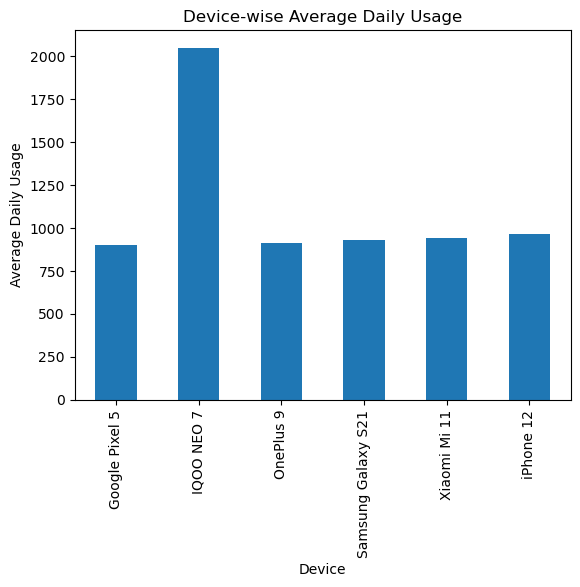

In [50]:


average_daily_usage = data1['Data Usage (MB/day)'].mean()
print(f"Overall Average Daily Usage: {average_daily_usage}")

gender_avg_usage = data1.groupby('Gender')['Data Usage (MB/day)'].mean()
device_avg_usage = data1.groupby('Device Model')['Data Usage (MB/day)'].mean()

print("Gender-wise Average Daily Usage:")
print(gender_avg_usage)

print("Device-wise Average Daily Usage:")
print(device_avg_usage)

gender_avg_usage.plot(kind='bar', color=['blue', 'pink'], title='Gender-wise Average Daily Usage')
plt.xlabel('Gender')
plt.ylabel('Average Daily Usage')
plt.show()

device_avg_usage.plot(kind='bar', title='Device-wise Average Daily Usage')
plt.xlabel('Device')
plt.ylabel('Average Daily Usage')
plt.show()



 4. Which device have highest popularity based on Age and Gender?

Device with highest popularity based on Age and Gender: ('Samsung Galaxy S21', 'Male')


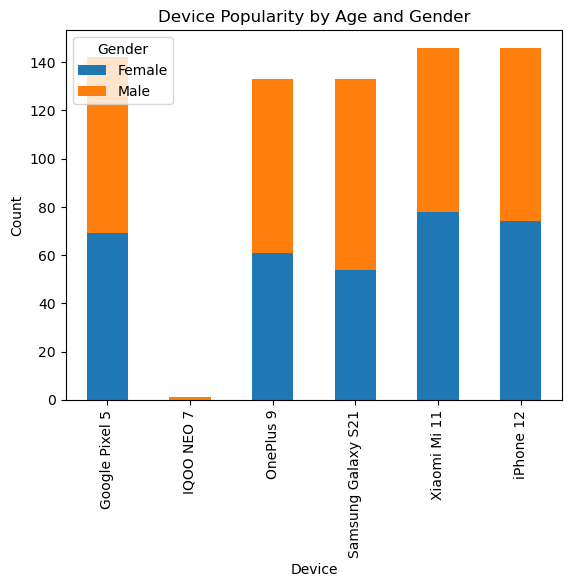

In [51]:

pAgedevice = data1.groupby(['Age', 'Gender'])['Device Model'].agg(lambda x: x.mode().iloc[0])
pAgedevice

device_popularity = data1.groupby(['Device Model', 'Gender'])['Age'].count()
highest_popularity = device_popularity.idxmax()
print(f"Device with highest popularity based on Age and Gender: {highest_popularity}")

popularity_pivot = data1.pivot_table(index='Device Model', columns='Gender', values='Age', aggfunc='count')
popularity_pivot.plot(kind='bar', stacked=True, title='Device Popularity by Age and Gender')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

<h1>CLASSWORK PMRP <h1>

Plot Distribution curve for Age along with histogram.
Calculate Q1,Q2,Q3 and IQR without using np.percentile function. 
Calculate lower and upper bound values.
Plot box plot as well for Age.
Calculate frequency table as well for age column. Ranges for this can be in multiple of 10, e.g. 10-20,20-30,etc..

In [52]:
data2=pd.read_csv("drug200.csv")
data2.head(),data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


(   Age Sex      BP Cholesterol  Na_to_K   Drug
 0   23   F    HIGH        HIGH   25.355  drugY
 1   47   M     LOW        HIGH   13.093  drugC
 2   47   M     LOW        HIGH   10.114  drugC
 3   28   F  NORMAL        HIGH    7.798  drugX
 4   61   F     LOW        HIGH   18.043  drugY,
 None,
               Age     Na_to_K
 count  200.000000  200.000000
 mean    44.315000   16.084485
 std     16.544315    7.223956
 min     15.000000    6.269000
 25%     31.000000   10.445500
 50%     45.000000   13.936500
 75%     58.000000   19.380000
 max     74.000000   38.247000)

1.Plot Distribution curve for Age along with histogram.

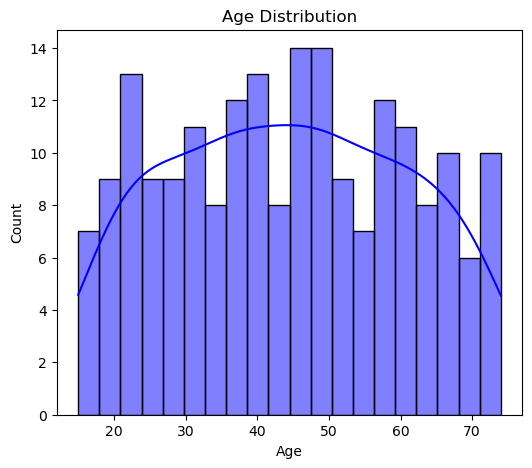

In [53]:


plt.figure(figsize=(6, 5))
sns.histplot(data2["Age"], kde=True, color='blue',bins=20)
plt.title('Age Distribution')
plt.show()


2.Calculate Q1,Q2,Q3 and IQR without using np.percentile function. 
Calculate lower and upper bound values.

In [54]:

def q_vals(col):
    q1 = col.sort_values().iloc[len(col) // 4]
    q2 = col.median()
    q3 = col.sort_values().iloc[(len(col) * 3) // 4]
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    return q1, q2, q3, iqr, lb, ub

q1, q2, q3, iqr, lb, ub = q_vals(data2["Age"])

print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}, IQR: {iqr}, LB: {lb}, UB: {ub}")


Q1: 31, Q2: 45.0, Q3: 58, IQR: 27, LB: -9.5, UB: 98.5


Plot box plot as well for Age.

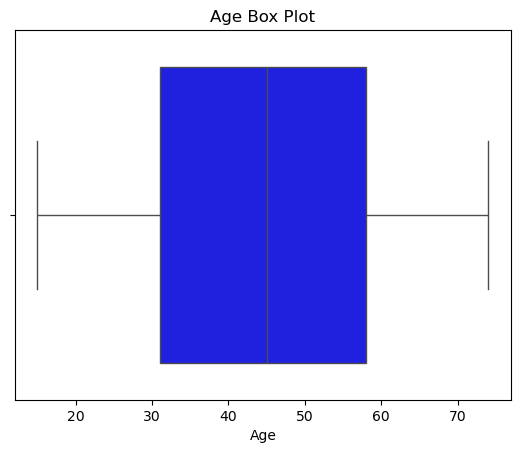

In [55]:
sns.boxplot(x=data2["Age"], color='blue')
plt.title('Age Box Plot')
plt.show()


4.Calculate frequency table as well for age column. Ranges for this can be in multiple of 10, e.g. 10-20,20-30,etc..

In [56]:
bins = list(range(10, data2["Age"].max() + 10, 10))
age_freq = pd.cut(data2["Age"], bins=bins).value_counts().sort_index()
print(age_freq)


Age
(10, 20]    16
(20, 30]    32
(30, 40]    39
(40, 50]    40
(50, 60]    33
(60, 70]    30
(70, 80]    10
Name: count, dtype: int64


<h2>SECOND DRAFT <h2>

1. What is a Gender distribution of data?
2. What percent of total population have high cholesterol & high BP?
3. What are the unique values of Drugs given in data? (df["Drug"].unique)
4. How many people have high cholesterol before age of 30?

1. What is a Gender distribution of data?

In [58]:
g_dist = data2['Sex'].value_counts()
print(g_dist)

Sex
M    104
F     96
Name: count, dtype: int64


2. What percent of total population have high cholesterol & high BP?

In [59]:

hc_hbp = len(data2[(data2['Cholesterol'] == 'HIGH') & (data2['BP'] == 'HIGH')])
total = len(data2)
pct_hc_hbp = (hc_hbp / total) * 100
print(f"{pct_hc_hbp:.2f}%")

17.50%


3. What are the unique values of Drugs given in data? (df["Drug"].unique)

In [61]:
d_vals = data2['Drug'].unique()
print(d_vals)


['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


4. How many people have high cholesterol before age of 30?

In [62]:
hc_under_30 = len(data2[(data2['Cholesterol'] == 'HIGH') & (data2['Age'] < 30)])
print(hc_under_30)

26
